<a href="https://colab.research.google.com/github/Rana-Shukor/vector1/blob/main/Copy_of_Intro_to_OpenCV_and_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

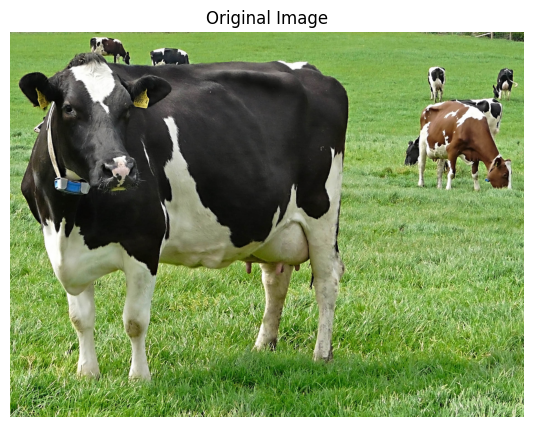

Image shape: (768, 1024, 3)


In [15]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Loading and displaying an image
image_path = '/content/HOLSTEIN-COW.jpg'  # Make sure this path is correct
image = cv2.imread(image_path)

# Check if the image loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    print("Image shape:", image.shape)




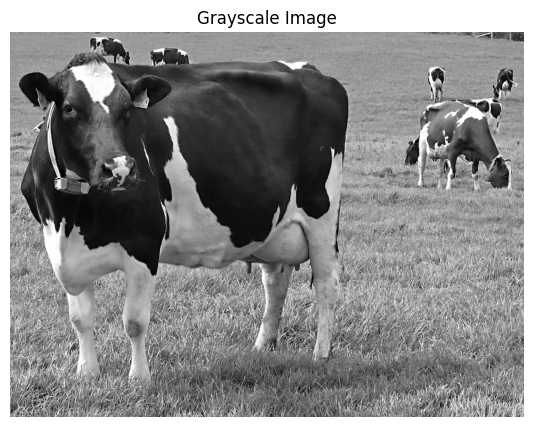

Grayscale image shape: (768, 1024)


In [16]:
# 2. Converting to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

print("Grayscale image shape:", gray_image.shape)



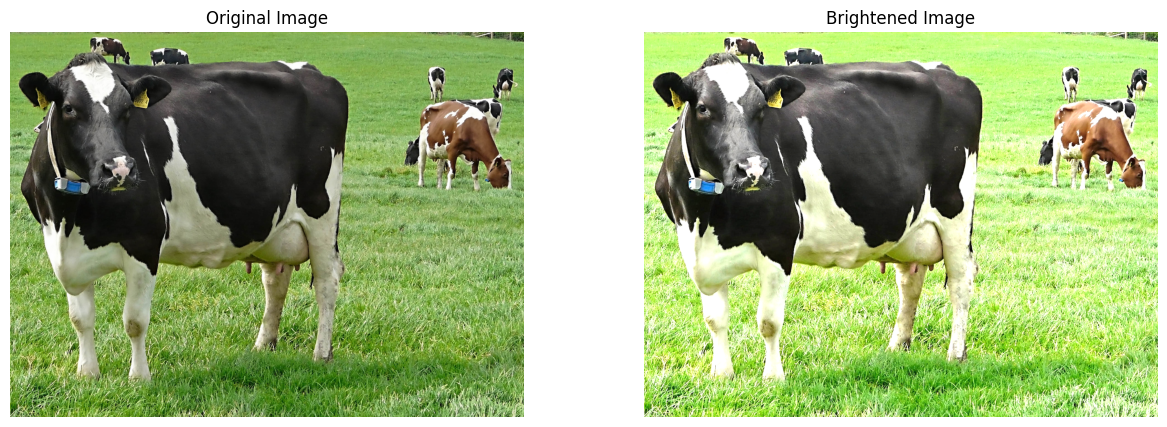

In [17]:
# 3. Point operation: Brightness adjustment
def adjust_brightness(image, factor):
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)

brightened_image = adjust_brightness(image_rgb, 1.5)

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(brightened_image), plt.title('Brightened Image'), plt.axis('off')
plt.show()



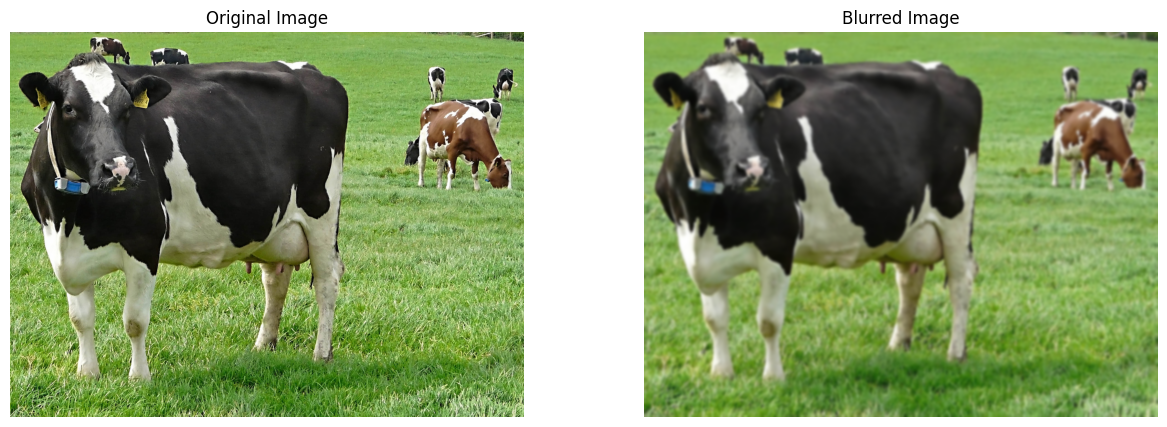

In [18]:
# 4. Local operation: Blurring
blurred_image = cv2.GaussianBlur(image_rgb, (15, 15), 0)

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(blurred_image), plt.title('Blurred Image'), plt.axis('off')
plt.show()



Flattened image shape: (786432, 3)


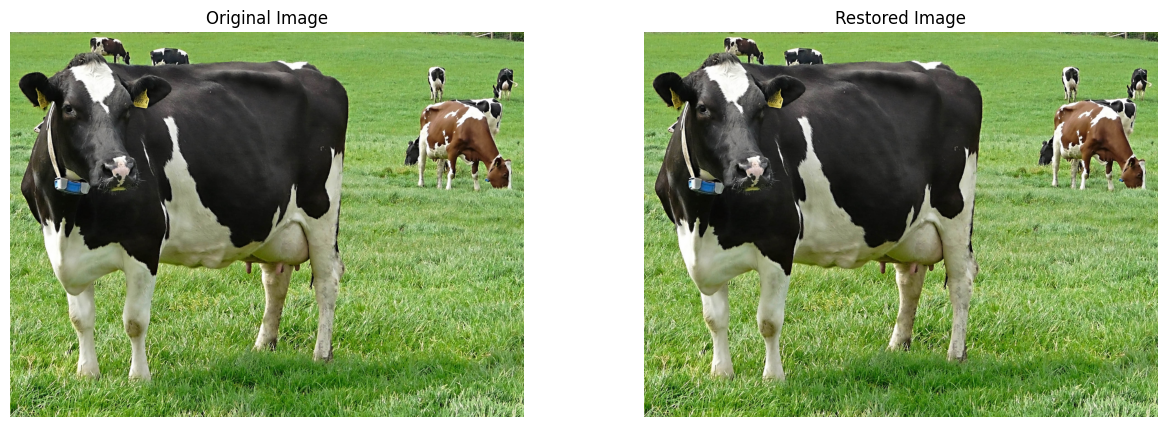

In [19]:
# 6. Reshaping image
flattened_image = image_rgb.reshape(-1, 3)
print("Flattened image shape:", flattened_image.shape)

# Reshape back to original dimensions
restored_image = flattened_image.reshape(image_rgb.shape)

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(restored_image), plt.title('Restored Image'), plt.axis('off')
plt.show()



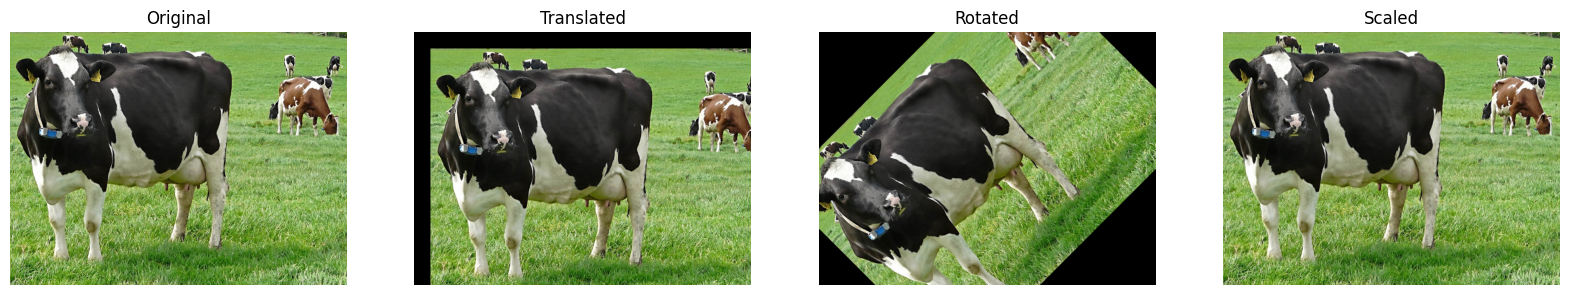

In [20]:
# 7. Pixel position transformations
def translate(image, x, y):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(image, M, (cols, rows))

def rotate(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

def scale(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

# Apply transformations
translated = translate(image_rgb, 50, 50)  # Translate 50 pixels right and down
rotated = rotate(image_rgb, 45)  # Rotate 45 degrees
scaled = scale(image_rgb, 0.5, 0.5)  # Scale to half size

# Display results
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(image_rgb), plt.title('Original'), plt.axis('off')
plt.subplot(142), plt.imshow(translated), plt.title('Translated'), plt.axis('off')
plt.subplot(143), plt.imshow(rotated), plt.title('Rotated'), plt.axis('off')
plt.subplot(144), plt.imshow(scaled), plt.title('Scaled'), plt.axis('off')
plt.show()

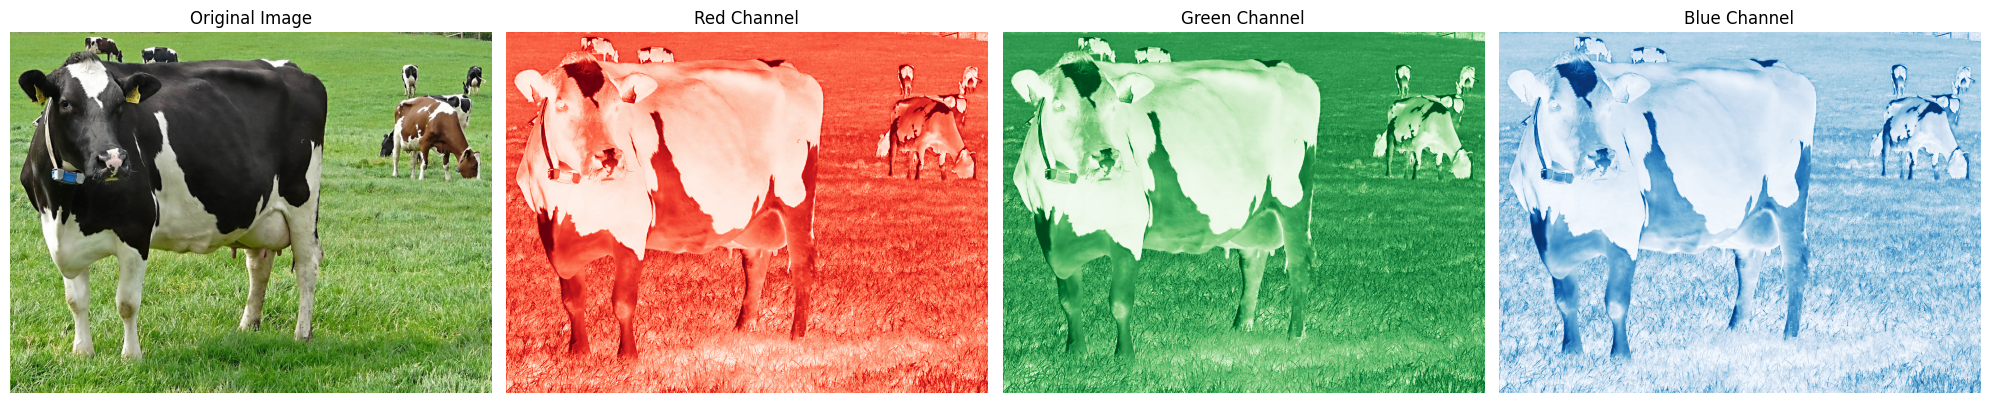

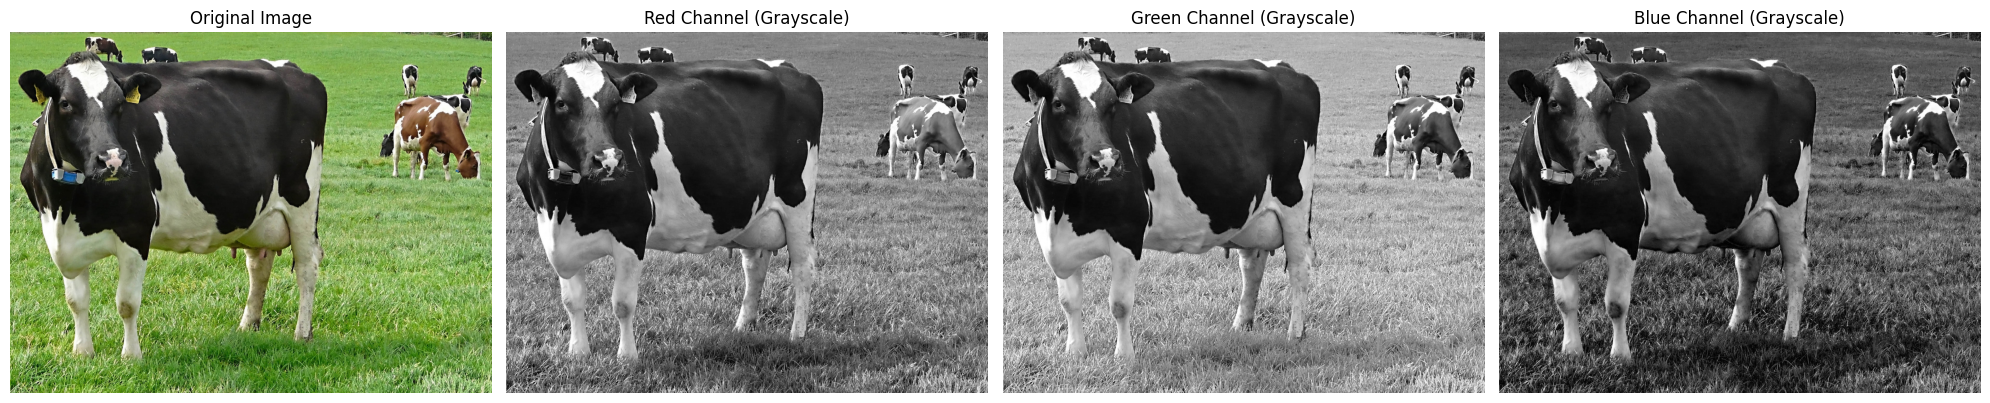

In [21]:
# 8. Plotting individual color channels

# Split the image into its three color channels
b, g, r = cv2.split(image)

# Create a figure with subplots for each channel and the original image
plt.figure(figsize=(20, 5))

# Original RGB image
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Red channel
plt.subplot(142)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(143)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(144)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optionally, you can also display the channels as grayscale images
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(r, cmap='gray')
plt.title('Red Channel (Grayscale)')
plt.axis('off')

plt.subplot(143)
plt.imshow(g, cmap='gray')
plt.title('Green Channel (Grayscale)')
plt.axis('off')

plt.subplot(144)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel (Grayscale)')
plt.axis('off')

plt.tight_layout()
plt.show()

# 9. Implementing Convolution

In this exercise, you'll implement a convolution operation on images. Follow these steps to create a `Convolution` class and use it to apply edge detection and Gaussian blur filters.

## Task: Implement the Convolution Class

Create a `Convolution` class with the following structure:

```python
import numpy as np

class Convolution:
    def __init__(self, kernel, padding=False):
        # Initialize the convolution with a kernel and padding option
        # Hint: You may want to store the kernel and padding as instance variables
        pass

    def convolve(self, image):
        # Implement the convolution operation
        # 1. If padding is True, pad the image
        # 2. Get image dimensions
        # 3. Get kernel dimensions
        # 4. Create output image of the same size as input image
        # 5. Iterate over the image:
        #    - Extract a patch of the image the same size as the kernel
        #    - Multiply this patch element-wise with the kernel and sum the result
        #    - Place the result in the output image
        # 6. Return the output image
        pass

# Example usage:
# conv = Convolution(kernel, padding=True)
# result = conv.convolve(image)
```

## Task: Create Edge Detection and Gaussian Blur Filters

After implementing the `Convolution` class, create two instances:

1. Edge Detection Filter:
   Use a Sobel filter for edge detection. You can use the following kernel:
   ```python
   edge_kernel = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]])
   ```

2. Gaussian Blur Filter:
   Create a 5x5 Gaussian kernel. You can use the following approximation:
   ```python
   gaussian_kernel = np.array([[1,  4,  6,  4, 1],
                               [4, 16, 24, 16, 4],
                               [6, 24, 36, 24, 6],
                               [4, 16, 24, 16, 4],
                               [1,  4,  6,  4, 1]]) / 256
   ```

## Task: Apply Filters and Plot Results

Apply both filters to an image and plot the results. Use matplotlib to display the original image alongside the filtered images.

Good luck! Once you've completed the implementation, you can run the cell below to test your convolution class with the edge detection and Gaussian blur filters.

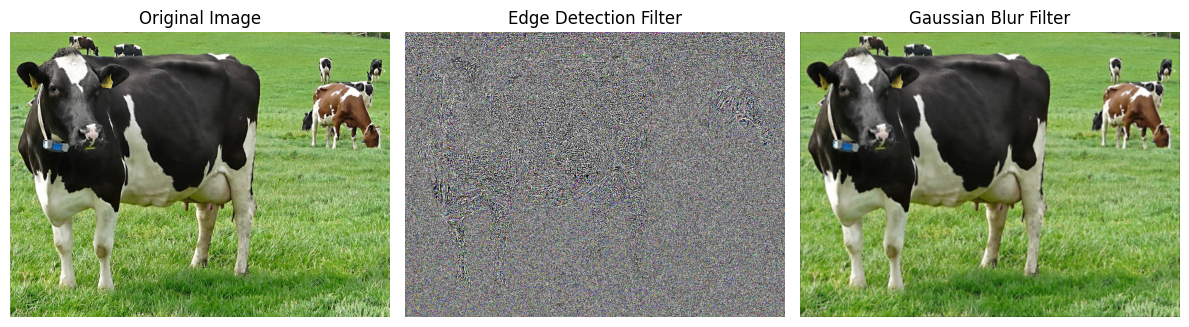

In [57]:
import numpy as np

class Convolution:
    def __init__(self, kernel, padding=False):
        self.kernel = kernel
        self.padding = padding

    def convolve(self, image):
        if self.padding:
            # Calculate padding size
            pad_size = self.kernel.shape[0] // 2
            # Pad the image
            image_padded = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')
        else:
            image_padded = image

        # Get image and kernel dimensions
        height, width, _ = image_padded.shape
        k_height, k_width = self.kernel.shape

        # Initialize output image
        output_image = np.zeros_like(image)

        # Perform convolution
        for i in range(height - k_height + 1):
            for j in range(width - k_width + 1):
                # Extract patch from image
                patch = image_padded[i:i + k_height, j:j + k_width, :]
                # Perform element-wise multiplication and sum
                output_image[i, j, :] = np.sum(patch * self.kernel[:, :, np.newaxis], axis=(0, 1))

        return output_image
# Edge Detection Filter: Sobel filter
edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

# Gaussian Blur Filter: 5x5 Gaussian kernel approximation
gaussian_kernel = np.array([[1,  4,  6,  4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1,  4,  6,  4, 1]]) / 256
import matplotlib.pyplot as plt
import cv2  # OpenCV for loading images

# Load an example image (you can replace this with your own image loading logic)
# Example using a random image (you should replace this with your own image loading code)
image_path = '/content/HOLSTEIN-COW.jpg'  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Initialize Convolution instances for edge detection and Gaussian blur
conv_edge = Convolution(edge_kernel, padding=True)
conv_blur = Convolution(gaussian_kernel, padding=True)

# Apply edge detection and Gaussian blur filters
edge_result = conv_edge.convolve(image)
blur_result = conv_blur.convolve(image)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(edge_result), cmap='gray')
plt.title('Edge Detection Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blur_result.astype(np.uint8))
plt.title('Gaussian Blur Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

